In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [14]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from xgboost import XGBRegressor
from IPython.display import clear_output
import torch
import torch.nn as nn
from torch.utils.data import Dataset
torch.manual_seed(20210614)
import itertools
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model
import time
from sklearn.gaussian_process import GaussianProcessRegressor

In [15]:
df_0 = pd.read_csv('RawData/two_widths/Param0_2width.csv')
df_1 = pd.read_csv('RawData/two_widths/Param1_2width.csv')
df_2 = pd.read_csv('RawData/two_widths/Param2_2width.csv')
df_3 = pd.read_csv('RawData/two_widths/Param3_2width.csv')
df_4 = pd.read_csv('RawData/two_widths/Param4_2width.csv')

df1 = pd.concat([df_0, df_1, df_2, df_3, df_4], axis = 0, ignore_index = True)
print(df1.keys())
df1 = shuffle(df1, random_state=20210614)

Index(['Frequency', 'Speed', 'Amplitude', 'Passes', 'Focal_Position', 'Depth',
       'Top_width', 'Bot_width'],
      dtype='object')


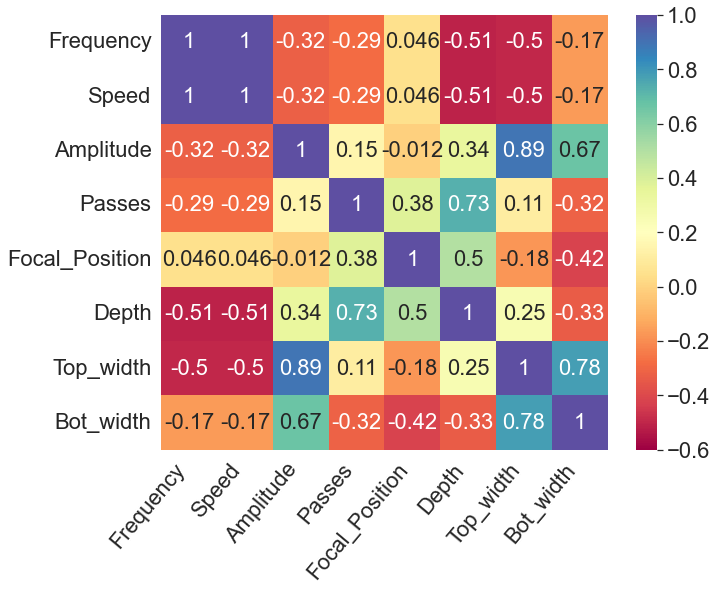

In [16]:
"""looking at the correlation between data """
fig= plt.figure(figsize=(10,8))

sns.set(font_scale=2)

heatmap = sns.heatmap(df1.iloc[:,0:].corr(), 
                      annot=True, annot_kws={'size': 22},
                      cmap="Spectral", vmin=-0.6, vmax=1,
                      cbar=True, xticklabels=True)

heatmap.set_xticklabels(heatmap.get_xticklabels(),
                        rotation=50, horizontalalignment='right'
                       )
# plt.savefig('Graphs/Tune_corr.png',bbox_inches='tight')
plt.show()

In [17]:
df1.Frequency.values / df1.Speed.values

array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40.])

In [18]:
# ###------- normalizing data 
normalizer = MinMaxScaler()
df_norm = normalizer.fit_transform(df1)

df = pd.DataFrame(df_norm, columns=df1.columns )
print(df.keys())

Index(['Frequency', 'Speed', 'Amplitude', 'Passes', 'Focal_Position', 'Depth',
       'Top_width', 'Bot_width'],
      dtype='object')


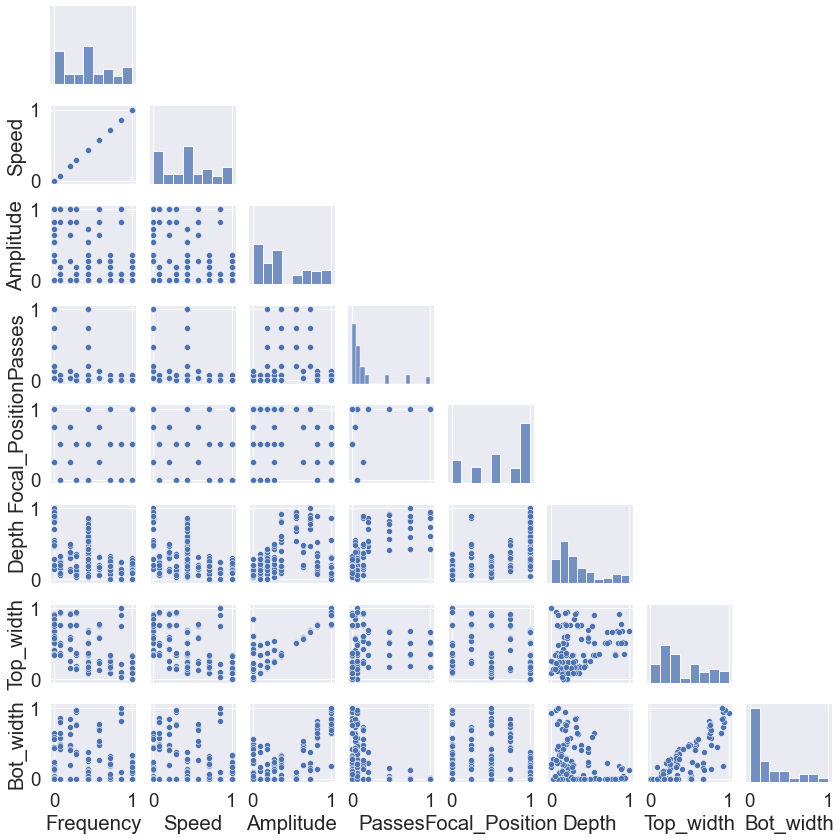

In [27]:
"""Looking at the mutual dependency of data for each feature
versus others, to see if there is any quadratic dependancy"""
sns.set(font_scale = 1.7)
# b = sns.violinplot(y = "Draughts", data = df)
sns.pairplot(data = df, corner = True, height=1.5)
# # plt.savefig('Graphs/Exp1_2pairplot.png')

plt.show()